In [1]:
# Import plotting modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import xgboost as xgb
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/943/datasets/4dbcaee889ef06fb0763e4a8652a4c1f268359b2/ames_housing_trimmed_processed.csv')

In [4]:
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65.0,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,1,0,0,0,1,208500
1,20,80.0,9600,6,8,1976,0,1262,0,1,...,0,1,0,0,0,0,0,0,1,181500
2,60,68.0,11250,7,5,2001,1,1786,1,0,...,0,0,0,0,1,0,0,0,1,223500
3,70,60.0,9550,7,5,1915,1,1717,1,0,...,0,0,0,0,1,0,0,0,1,140000
4,60,84.0,14260,8,5,2000,0,2198,1,0,...,0,0,0,0,1,0,0,0,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,1,1647,0,0,...,0,0,0,0,1,0,0,0,1,175000
1456,20,85.0,13175,6,6,1978,1,2073,1,0,...,0,1,0,0,0,0,0,0,1,210000
1457,70,66.0,9042,7,9,1941,1,2340,0,0,...,0,0,0,0,1,0,0,0,1,266500
1458,20,68.0,9717,5,6,1950,1,1078,1,0,...,0,1,0,0,0,0,0,0,1,142125


In [5]:
# Decision trees

# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

X.shape, y.shape

((569, 30), (569,))

## Classification with XGBoost

In [6]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train,y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)


accuracy: 0.9736842105263158


In [7]:
# Create the DMatrix from X and y: churn_dmatrix
bc_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:logistic", "max_depth":3}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=bc_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="error", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the accuracy
print(((1-cv_results["test-error-mean"]).iloc[-1]))

   train-error-mean  train-error-std  test-error-mean  test-error-std
0          0.025480         0.002451         0.066824        0.019564
1          0.021969         0.001257         0.061524        0.013876
2          0.014945         0.006589         0.056252        0.010004
3          0.012306         0.003300         0.052734        0.011418
4          0.010549         0.004314         0.054497        0.012485
0.9455026666666666


In [8]:
# Perform cross_validation: cv_results
cv_results = xgb.cv(dtrain=bc_dmatrix, params=params, 
                  nfold=3, num_boost_round=5, 
                  metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.987225       0.001301       0.961473      0.024760
1        0.993244       0.004295       0.969078      0.022616
2        0.995224       0.003751       0.972491      0.024377
3        0.997125       0.002042       0.971354      0.025405
4        0.997610       0.001871       0.974002      0.026527
0.9740019999999999


## Regression with XGBoost

In [9]:
boston_data = pd.read_csv("boston.csv")
X, y = boston_data.iloc[:,:-1],boston_data.iloc[:,-1]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

In [10]:
X.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [11]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [12]:
from sklearn.metrics import mean_squared_error,r2_score

In [13]:
# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=123, n_estimators=10)

# Fit the regressor to the training set
xg_reg.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 3.782443


In [14]:
xg_reg.score(X_test,y_test)

0.8270774737906696

In [15]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [16]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/943/datasets/4dbcaee889ef06fb0763e4a8652a4c1f268359b2/ames_housing_trimmed_processed.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1460 non-null   int64  
 1   LotFrontage           1460 non-null   float64
 2   LotArea               1460 non-null   int64  
 3   OverallQual           1460 non-null   int64  
 4   OverallCond           1460 non-null   int64  
 5   YearBuilt             1460 non-null   int64  
 6   Remodeled             1460 non-null   int64  
 7   GrLivArea             1460 non-null   int64  
 8   BsmtFullBath          1460 non-null   int64  
 9   BsmtHalfBath          1460 non-null   int64  
 10  FullBath              1460 non-null   int64  
 11  HalfBath              1460 non-null   int64  
 12  BedroomAbvGr          1460 non-null   int64  
 13  Fireplaces            1460 non-null   int64  
 14  GarageArea            1460 non-null   int64  
 15  MSZoning_FV          

In [18]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,Remodeled,GrLivArea,BsmtFullBath,BsmtHalfBath,...,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65.0,8450,7,5,2003,0,1710,1,0,...,0,0,0,0,1,0,0,0,1,208500
1,20,80.0,9600,6,8,1976,0,1262,0,1,...,0,1,0,0,0,0,0,0,1,181500
2,60,68.0,11250,7,5,2001,1,1786,1,0,...,0,0,0,0,1,0,0,0,1,223500
3,70,60.0,9550,7,5,1915,1,1717,1,0,...,0,0,0,0,1,0,0,0,1,140000
4,60,84.0,14260,8,5,2000,0,2198,1,0,...,0,0,0,0,1,0,0,0,1,250000


In [19]:
X= df.drop('SalePrice', axis=1)

In [20]:
y = df['SalePrice']

In [21]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123)

In [22]:
# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', seed=123, n_estimators=10)

# Fit the regressor to the training set
xg_reg.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 28106.463641


In [23]:
xg_reg.score(X_test,y_test)

0.8721646412791145

In [24]:
xg_reg.score(X_train,y_train)

0.9550122140945753

In [25]:
r2_score(y_test,preds)

0.8721646412791145

In [26]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test =  xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:squarederror"}

# Train the model: xg_reg
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 42259.004083


In [27]:
r2_score(y_test,preds)

0.7110138041944665

## Evaluating model quality

In [28]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='rmse', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.535156      429.451316   142980.433594    1193.791602
1    102832.542969      322.473304   104891.392578    1223.157623
2     75872.617188      266.469946    79478.939454    1601.341377
3     57245.650390      273.623926    62411.921875    2220.149857
4     44401.298828      316.423666    51348.281250    2963.378741
4    51348.28125
Name: test-rmse-mean, dtype: float64


In [29]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics='mae', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-mae-mean"]).tail(1))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.480469     668.337982  127633.972657   2404.002681
1    89770.052735     456.957620   90122.501953   2107.912682
2    63580.790039     263.405712   64278.563477   1887.565119
3    45633.153321     151.884551   46819.166016   1459.819398
4    33587.093750      86.999137   35670.645508   1140.606558
4    35670.645508
Name: test-mae-mean, dtype: float64


### Using regularization in XGBoost

In [30]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:squarederror","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
    l2          rmse
0    1  52275.357422
1   10  57746.062500
2  100  76624.625001


### Visualizing individual XGBoost trees

In [31]:
from xgboost import plot_tree

In [32]:
# Create the DMatrix: housing_dmatrix
#housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
#params = {"objective":"reg:squarederror", "max_depth":2}

# Train the model: xg_reg
#xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
#xgb.plot_tree(booster=xg_reg, num_trees=0)
#plt.show()

# Plot the fifth tree
#xgb.plot_tree(xg_reg, num_trees=4)
#plt.show()

# Plot the last tree sideways
#xgb.plot_tree(xg_reg, rankdir='LR', num_trees=9)
#plt.show()

## Visualizing feature importances: What features are most important in my dataset 

In [33]:
xg_reg

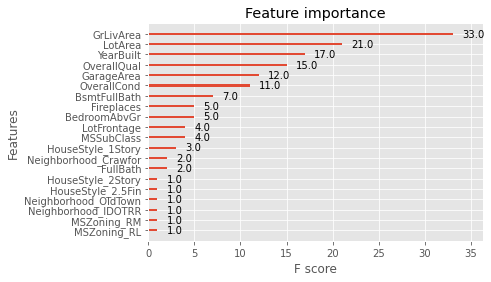

In [34]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror","max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()

## Fine-tuning your XGBoost model

### Tuning the number of boosting rounds

In [35]:
housing_data = pd.read_csv('https://assets.datacamp.com/production/repositories/943/datasets/4dbcaee889ef06fb0763e4a8652a4c1f268359b2/ames_housing_trimmed_processed.csv')
X,y = housing_data[housing_data.columns.tolist()[:-1]],housing_data[housing_data.columns.tolist()[-1]]

In [36]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params 
params = {"objective":"reg:squarederror","max_depth":3}

# Create list of number of boosting rounds
num_rounds = [5, 10, 15]

# Empty list to store final round rmse per XGBoost model
final_rmse_per_round = []

# Iterate over num_rounds and build one model per num_boost_round parameter
for curr_num_rounds in num_rounds:

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=3, num_boost_round=curr_num_rounds, metrics="rmse", as_pandas=True, seed=123)
    
    # Append final round RMSE
    final_rmse_per_round.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
num_rounds_rmses = list(zip(num_rounds, final_rmse_per_round))
print(pd.DataFrame(num_rounds_rmses,columns=["num_boosting_rounds","rmse"]))

   num_boosting_rounds          rmse
0                    5  50903.298177
1                   10  34774.192709
2                   15  32895.097656


### Automated boosting round selection using early_stopping

In [37]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(nfold=3,dtrain=housing_dmatrix, params=params, 
                    num_boost_round=150, metrics="rmse", as_pandas=True, seed=123, early_stopping_rounds=10)

# Print cv_results
print(cv_results)

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0     141871.635417      403.636200   142640.656250     705.559400
1     103057.036459       73.769561   104907.666667     111.114933
2      75975.968750      253.729627    79262.057292     563.763447
3      57420.531250      521.656755    61620.135417    1087.693857
4      44552.955729      544.170190    50437.559896    1846.446535
5      35763.947917      681.797248    43035.661458    2034.469207
6      29861.463542      769.572072    38600.881510    2169.798065
7      25994.675781      756.521419    36071.817708    2109.795430
8      23306.836588      759.238254    34383.184896    1934.546688
9      21459.769531      745.624999    33509.141276    1887.375284
10     20148.721354      749.612769    32916.807943    1850.894476
11     19215.382813      641.387565    32197.833333    1734.456784
12     18627.389323      716.256794    31770.852865    1802.154800
13     17960.694661      557.043073    31482.782552    1779.12

### Tuning eta

In [38]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:squarederror", "max_depth":3}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_val = [.001, .01, .1]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_val:

    params["eta"] = curr_val
    
    # Perform cross-validation: cv_results
    cv_results = xgb.cv(nfold=3,dtrain=housing_dmatrix,     
                        params=params, num_boost_round=10, metrics="rmse", 
                        as_pandas=True, seed=123, early_stopping_rounds=5)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_val, best_rmse)), columns=["eta","best_rmse"]))

     eta      best_rmse
0  0.001  195736.406250
1  0.010  179932.187500
2  0.100   79759.411459


## Tuning max_depth

In [39]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:squarederror"}

# Create list of max_depth values
max_depths = [2,5,10,20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(nfold=2,dtrain=housing_dmatrix,     
                        params=params, num_boost_round=10, metrics="rmse", 
                        as_pandas=True, seed=123, early_stopping_rounds=5)
    
    
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"]).sort_values(by="best_rmse"))

   max_depth     best_rmse
1          5  35596.599610
2         10  36065.548829
3         20  36739.578125
0          2  37957.468750


### Tuning colsample_bytree

In [40]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:squarederror","max_depth":5}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [.1,.5,.8,1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params ['colsample_bytree'] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2,
                 num_boost_round=10, early_stopping_rounds=5,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), 
                   columns=["colsample_bytree","best_rmse"]).sort_values(by="best_rmse"))

   colsample_bytree     best_rmse
2               0.8  33965.726562
1               0.5  34545.386719
3               1.0  35596.599610
0               0.1  39872.406250


### Grid search with XGBoost

In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [42]:
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [.3, .7],
    'n_estimators': [50],
    'max_depth': [2, 5]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring='neg_mean_squared_error', cv=4, verbose=1)


# Fit grid_mse to the data
grid_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 4 folds for each of 4 candidates, totalling 16 fits
Best parameters found:  {'colsample_bytree': 0.3, 'max_depth': 5, 'n_estimators': 50}
Lowest RMSE found:  28986.18703093561


In [43]:
# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': np.arange(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid, 
                                    scoring='neg_mean_squared_error', n_iter=5,cv=4, verbose=1)


# Fit randomized_mse to the data
randomized_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits
Best parameters found:  {'n_estimators': 25, 'max_depth': 4}
Lowest RMSE found:  29998.4522530019


### Exploratory data analysis

In [44]:
df = pd.read_csv('ames_unprocessed_data.csv')

In [45]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,RL,65.0,8450,CollgCr,1Fam,2Story,7,5,2003,...,1710,1,0,2,1,3,0,548,Y,208500
1,20,RL,80.0,9600,Veenker,1Fam,1Story,6,8,1976,...,1262,0,1,2,0,3,1,460,Y,181500
2,60,RL,68.0,11250,CollgCr,1Fam,2Story,7,5,2001,...,1786,1,0,2,1,3,1,608,Y,223500
3,70,RL,60.0,9550,Crawfor,1Fam,2Story,7,5,1915,...,1717,1,0,1,0,3,1,642,Y,140000
4,60,RL,84.0,14260,NoRidge,1Fam,2Story,8,5,2000,...,2198,1,0,2,1,4,1,836,Y,250000


In [46]:
df.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1201 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   Neighborhood  1460 non-null   object 
 5   BldgType      1460 non-null   object 
 6   HouseStyle    1460 non-null   object 
 7   OverallQual   1460 non-null   int64  
 8   OverallCond   1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  Remodeled     1460 non-null   int64  
 11  GrLivArea     1460 non-null   int64  
 12  BsmtFullBath  1460 non-null   int64  
 13  BsmtHalfBath  1460 non-null   int64  
 14  FullBath      1460 non-null   int64  
 15  HalfBath      1460 non-null   int64  
 16  BedroomAbvGr  1460 non-null   int64  
 17  Fireplaces    1460 non-null   int64  
 18  GarageArea    1460 non-null 

In [48]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Fill missing values with 0
df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == 'object')

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# Print the head of the categorical columns
print(df[categorical_columns].head())

# Create LabelEncoder object: le
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print(df[categorical_columns].head())

  MSZoning Neighborhood BldgType HouseStyle PavedDrive
0       RL      CollgCr     1Fam     2Story          Y
1       RL      Veenker     1Fam     1Story          Y
2       RL      CollgCr     1Fam     2Story          Y
3       RL      Crawfor     1Fam     2Story          Y
4       RL      NoRidge     1Fam     2Story          Y
   MSZoning  Neighborhood  BldgType  HouseStyle  PavedDrive
0         3             5         0           5           2
1         3            24         0           2           2
2         3             5         0           5           2
3         3             6         0           5           2
4         3            15         0           5           2


In [49]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,3,65.0,8450,5,0,5,7,5,2003,...,1710,1,0,2,1,3,0,548,2,208500
1,20,3,80.0,9600,24,0,2,6,8,1976,...,1262,0,1,2,0,3,1,460,2,181500
2,60,3,68.0,11250,5,0,5,7,5,2001,...,1786,1,0,2,1,3,1,608,2,223500
3,70,3,60.0,9550,6,0,5,7,5,1915,...,1717,1,0,1,0,3,1,642,2,140000
4,60,3,84.0,14260,15,0,5,8,5,2000,...,2198,1,0,2,1,4,1,836,2,250000


### Encoding categorical columns II: OneHotEncoder

In [50]:
df = pd.read_csv('ames_unprocessed_data.csv')

In [51]:
# Fill missing values with 0
df.LotFrontage = df.LotFrontage.fillna(0)

# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == 'object')

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

In [52]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder: ohe
ohe = OneHotEncoder( sparse=False)

# Apply OneHotEncoder to categorical columns - output is no longer a dataframe: df_encoded
df_encoded = ohe.fit_transform(df[categorical_columns])

# Print first 5 rows of the resulting dataset - again, this will no longer be a pandas dataframe
print(df_encoded[:5, :])

# Print the shape of the original DataFrame
print(df.shape)

# Print the shape of the transformed array
print(df_encoded.shape)

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]]
(1460, 21)
(1460, 46)


In [53]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,PavedDrive,SalePrice
0,60,RL,65.0,8450,CollgCr,1Fam,2Story,7,5,2003,...,1710,1,0,2,1,3,0,548,Y,208500
1,20,RL,80.0,9600,Veenker,1Fam,1Story,6,8,1976,...,1262,0,1,2,0,3,1,460,Y,181500
2,60,RL,68.0,11250,CollgCr,1Fam,2Story,7,5,2001,...,1786,1,0,2,1,3,1,608,Y,223500
3,70,RL,60.0,9550,Crawfor,1Fam,2Story,7,5,1915,...,1717,1,0,1,0,3,1,642,Y,140000
4,60,RL,84.0,14260,NoRidge,1Fam,2Story,8,5,2000,...,2198,1,0,2,1,4,1,836,Y,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Gilbert,1Fam,2Story,6,5,1999,...,1647,0,0,2,1,3,1,460,Y,175000
1456,20,RL,85.0,13175,NWAmes,1Fam,1Story,6,6,1978,...,2073,1,0,2,0,3,2,500,Y,210000
1457,70,RL,66.0,9042,Crawfor,1Fam,2Story,7,9,1941,...,2340,0,0,2,0,4,2,252,Y,266500
1458,20,RL,68.0,9717,NAmes,1Fam,1Story,5,6,1950,...,1078,1,0,1,0,2,0,240,Y,142125


In [54]:
# Import DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# Convert df into a dictionary: df_dict
df_dict = df.to_dict('records')

# Create the DictVectorizer object: dv
dv = DictVectorizer(sparse=False)

# Apply dv on df: df_encoded
df_encoded = dv.fit_transform(df_dict)

# Print the resulting first five rows
print(df_encoded[:5,:])

# Print the vocabulary
print(dv.vocabulary_)

[[3.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 2.000e+00 5.480e+02 1.710e+03 1.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  8.450e+03 6.500e+01 6.000e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 5.000e+00 7.000e+00
  0.000e+00 0.000e+00 1.000e+00 0.000e+00 2.085e+05 2.003e+03]
 [3.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  1.000e+00 1.000e+00 2.000e+00 4.600e+02 1.262e+03 0.000e+00 0.000e+00
  0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  9.600e+03 8.000e+01 2.000e+01 0.000e+00 0.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 

### Preprocessing within a pipeline

In [68]:
# Import necessary modules
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer

X, y = df.iloc[:,:-1], df.iloc[:,-1]

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor())]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Fit the pipeline
xgb_pipeline.fit(X.to_dict('records'),y)

Pipeline(steps=[('ohe_onestep', DictVectorizer(sparse=False)),
                ('xgb_model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

### Cross-validating your XGBoost model

In [69]:
# Import necessary modules
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Fill LotFrontage missing values with 0
X.LotFrontage = X.LotFrontage.fillna(0)

# Setup the pipeline steps: steps
steps = [("ohe_onestep", DictVectorizer(sparse=False)),
         ("xgb_model", xgb.XGBRegressor(max_depth=2, objective="reg:squarederror"))]

# Create the pipeline: xgb_pipeline
xgb_pipeline = Pipeline(steps)

# Cross-validate the model
cross_val_scores = cross_val_score(xgb_pipeline,X.to_dict('records'),y,cv=10, scoring='neg_mean_squared_error')

# Print the 10-fold RMSE
print("10-fold RMSE: ", np.mean(np.sqrt(np.abs(cross_val_scores))))

10-fold RMSE:  27683.04157118635


In [73]:
X.to_dict('records')

[{'MSSubClass': 60,
  'MSZoning': 'RL',
  'LotFrontage': 65.0,
  'LotArea': 8450,
  'Neighborhood': 'CollgCr',
  'BldgType': '1Fam',
  'HouseStyle': '2Story',
  'OverallQual': 7,
  'OverallCond': 5,
  'YearBuilt': 2003,
  'Remodeled': 0,
  'GrLivArea': 1710,
  'BsmtFullBath': 1,
  'BsmtHalfBath': 0,
  'FullBath': 2,
  'HalfBath': 1,
  'BedroomAbvGr': 3,
  'Fireplaces': 0,
  'GarageArea': 548,
  'PavedDrive': 'Y'},
 {'MSSubClass': 20,
  'MSZoning': 'RL',
  'LotFrontage': 80.0,
  'LotArea': 9600,
  'Neighborhood': 'Veenker',
  'BldgType': '1Fam',
  'HouseStyle': '1Story',
  'OverallQual': 6,
  'OverallCond': 8,
  'YearBuilt': 1976,
  'Remodeled': 0,
  'GrLivArea': 1262,
  'BsmtFullBath': 0,
  'BsmtHalfBath': 1,
  'FullBath': 2,
  'HalfBath': 0,
  'BedroomAbvGr': 3,
  'Fireplaces': 1,
  'GarageArea': 460,
  'PavedDrive': 'Y'},
 {'MSSubClass': 60,
  'MSZoning': 'RL',
  'LotFrontage': 68.0,
  'LotArea': 11250,
  'Neighborhood': 'CollgCr',
  'BldgType': '1Fam',
  'HouseStyle': '2Story',
  'O

### Kidney disease case study I: Categorical Imputer

In [60]:
# Kidney disease case study I: Categorical Imputer

kidney_data = pd.read_csv('chronic_kidney_disease.csv',header=None,na_values='?')

kidney_feature_names = ['age','bp','sg','al','su','bgr','bu','sc','sod',
                        'pot','hemo','pcv','wc','rc','rbc','pc','pcc',
                        'ba','htn','dm','cad','appet','pe','ane']
kidney_target_name = ['class']
kidney_data.columns = kidney_feature_names + kidney_target_name
X, y = kidney_data.iloc[:,:-1], kidney_data.iloc[:,-1]

In [61]:
kidney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   bgr     248 non-null    object 
 6   bu      335 non-null    object 
 7   sc      396 non-null    object 
 8   sod     396 non-null    object 
 9   pot     356 non-null    float64
 10  hemo    381 non-null    float64
 11  pcv     383 non-null    float64
 12  wc      313 non-null    float64
 13  rc      312 non-null    float64
 14  rbc     348 non-null    float64
 15  pc      329 non-null    float64
 16  pcc     294 non-null    float64
 17  ba      269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [67]:
from sklearn.pipeline import FeatureUnion

In [80]:
# Tuning XGBoost hyperparameters in a Pipeline XGBRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

names = ["crime","zone","industry","charles","no","rooms","age", 
         "distance","radial","tax","pupil","aam","lower","med_price"]
data = pd.read_csv("boston.csv",names=names,skiprows=1) 
X, y = data.iloc[:,:-1],data.iloc[:,-1]

xgb_pipeline = Pipeline([("st_scaler",StandardScaler()), 
                        ("xgb_model",xgb.XGBRegressor())])

gbm_param_grid = {'xgb_model__subsample': np.arange(.05, 1, .05),
                  'xgb_model__max_depth': np.arange(3,20,1),
                  'xgb_model__colsample_bytree': np.arange(.1,1.05,.05) }

randomized_neg_mse = \
RandomizedSearchCV (estimator=xgb_pipeline,n_iter=10,
                    param_distributions=gbm_param_grid,
                    scoring='neg_mean_squared_error', cv=4)

randomized_neg_mse.fit(X, y)

RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[('st_scaler', StandardScaler()),
                                             ('xgb_model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           enable_categorical=False,
                                                           gamma=None,
                                                           gpu_id=None,
                                                           importance_type=None,
                                                           interaction_constraints=None,
                                            

In [78]:
print("Best rmse: ", np.sqrt(np.abs(randomized_neg_mse.best_score_)))

Best rmse:  5.06826520798746


In [79]:
print("Best model: ", randomized_neg_mse.best_estimator_)

Best model:  Pipeline(steps=[('st_scaler', StandardScaler()),
                ('xgb_model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.9000000000000002,
                              enable_categorical=False, gamma=0, gpu_id=-1,
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=13, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=0.2,
                              tree_method='exact', validate_parameters=1,
                              ve

In [ ]:
# Create the parameter grid
gbm_param_grid = {
    'clf__learning_rate': np.arange(.05, 1, .05),
    'clf__max_depth': np.arange(3, 10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=pipeline, param_distributions=gbm_param_grid, n_iter=2, cv=2, verbose=1, scoring='roc_auc')

# Fit the estimator
randomized_roc_auc.fit(X,y)

# Compute metrics
print(randomized_roc_auc.best_score_)
print(randomized_roc_auc.best_estimator_)